In [ ]:
# Connect to Google Drive 
from google.colab import drive
drive.mount('/content/drive')

# Fetch Data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TAMU/FA 2021/CSCE 482/transaction.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# print(data.info())
# print(data.describe())
# data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
#Kazy run
data = pd.read_csv("/content/drive/MyDrive/TAMU/FALL2021/transaction.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# print(data.info())
# print(data.describe())
# data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


# **Exploratory Analysis**

In our exploratory analysis, we will observe if there exists an imbalance between classified fraud or not fraud data on a bar graph. We will use the boxplot and ANOVA to determine if there is a significant difference in fraudulent transactions in different periods. We will also look into the amount of different types of transactions with an illustration on a bar graph. Moreover, we will compare the difference in transaction amounts between source and destination balance to discover if discrepancies exist. Furthermore, the distribution of transaction amount for fraud or not fraud can be studied with a histogram. Finally, we will study the relationships among features with visual supports such as the correlation matrix plot, scatter plot, and density plot.


In [ ]:
sns.set_style("dark")

# Stats in Fraud and Flag Fraud
isfraud = data.groupby((data.isFraud == 1)).size().reset_index()
isfraud.columns = ['isFraud', 'count']
isFlaggedfraud = data.groupby((data.isFlaggedFraud == 1)).size().reset_index()
isFlaggedfraud.columns = ['isFlaggedFraud', 'count']
fraudflags = data.groupby(['isFraud','isFlaggedFraud']).size().reset_index()
fraudflags.columns = ['isFraud', 'isFlaggedFraud', 'count']


def printTable(df):
  colnames = df.columns.values.tolist()
  mydata = df.values.tolist()
  print(tabulate(mydata, headers=colnames, tablefmt='orgtbl'))
  print("\n")
printTable(isfraud)
printTable(isFlaggedfraud)
printTable(fraudflags)


# Determine the factor of Flagged Fraud 
print('\nThe type of transactions in isFlaggedFraud: \
{}'.format(list(data.loc[data.isFlaggedFraud == 1].type.drop_duplicates()))) 

dfTransfer = data.loc[data.type == 'TRANSFER']
dfFlagged = data.loc[data.isFlaggedFraud == 1]

print('\nMin amount transacted in isFlaggedFraud when flagged: {}'.format(dfFlagged.amount.min())) 
print('\nMax amount transacted in isFlaggedFraud when not flagged: {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))

# Determine the factor of Fraud 
print('\nThe type of transactions in isFlaggedFraud: \
{}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates()))) 

dfFraud = data.loc[data.isFraud == 1]

print('\nMin amount transacted in isFraud when fraud: {}'.format(dfFraud.amount.min())) 
print('\nMax amount transacted in isFraud when not fraud: {}'.format(dfTransfer.loc[dfTransfer.isFraud == 0].amount.max()))



| isFraud   |   count |
|-----------+---------|
| False     | 1047433 |
| True      |    1142 |


| isFlaggedFraud   |   count |
|------------------+---------|
| False            | 1048575 |


|   isFraud |   isFlaggedFraud |   count |
|-----------+------------------+---------|
|         0 |                0 | 1047433 |
|         1 |                0 |    1142 |



The type of transactions in isFlaggedFraud: []

Min amount transacted in isFlaggedFraud when flagged: nan

Max amount transacted in isFlaggedFraud when not flagged: 10000000.0

The type of transactions in isFlaggedFraud: ['TRANSFER', 'CASH_OUT']

Min amount transacted in isFraud when fraud: 119.0

Max amount transacted in isFraud when not fraud: 6419835.27


Not Fraud Types: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER    528812 
DEBIT       41432  
Name: type, dtype: int64 

Fraud Types: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64 



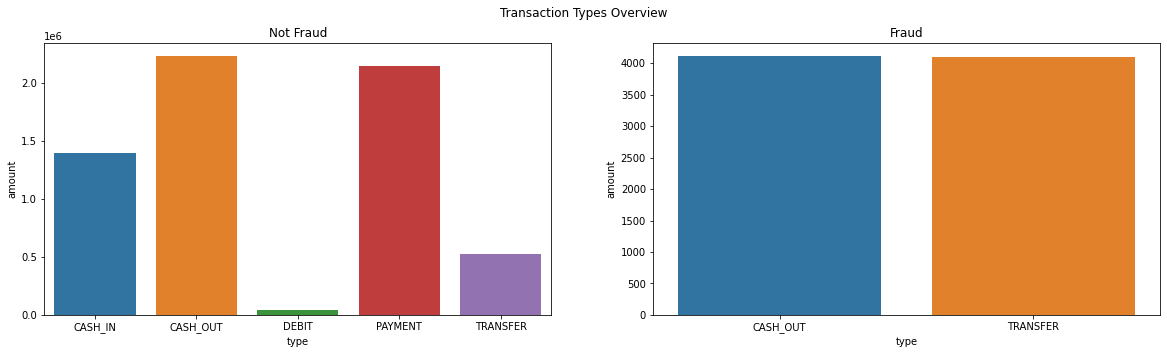

In [ ]:
# Bar graph transaction types
# ??using table
fig, axes = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Transaction Types Overview')
axes[0].set_title('Not Fraud')
axes[1].set_title('Fraud')

notfraud = data.loc[data['isFraud'] == 0]
fraud = data.loc[data['isFraud'] == 1]

fraud_type = fraud.groupby(['type']).count().reset_index()
sns.barplot(ax = axes[1], x = 'type', y = 'amount', data = fraud_type)

notfraud_type = notfraud.groupby(['type']).count().reset_index()
sns.barplot(ax = axes[0], x = 'type', y = 'amount', data = notfraud_type)


print("Not Fraud Types: \n", notfraud.type.value_counts(), "\n")
print("Fraud Types: \n", fraud.type.value_counts(), "\n")

[(0.0, 30000000.0)]

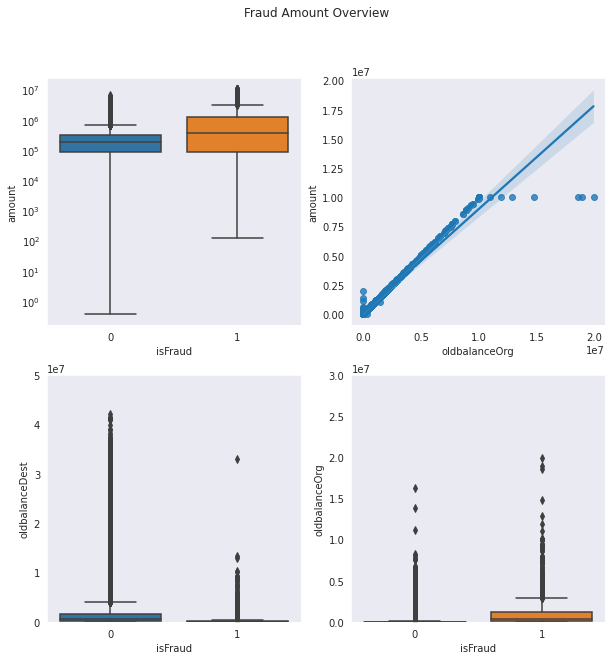

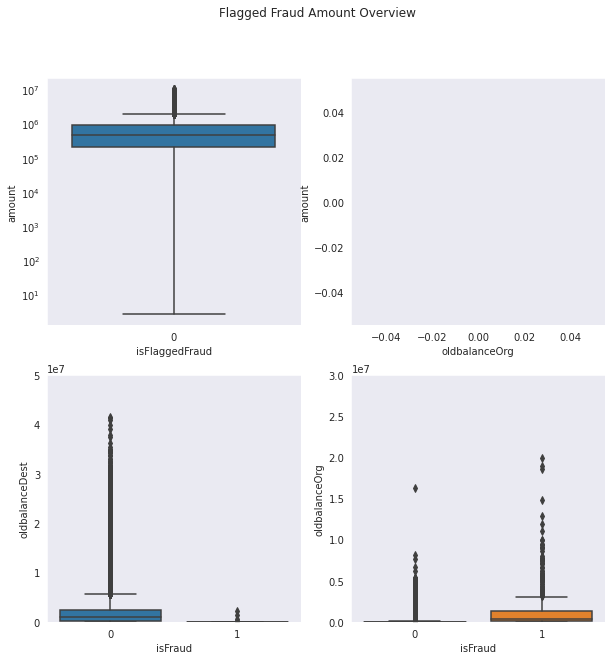

In [ ]:
# Boxplot comparison on amount and fraud
# Fraud 
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Fraud Amount Overview')
tmp = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

sns.boxplot(ax=axes[0][0], x = 'isFraud', y = 'amount', data = tmp)
axes[0][0].set_yscale('log')
sns.regplot(ax=axes[0][1], x = 'oldbalanceOrg', y = 'amount', data = tmp.loc[(data.isFraud ==1)])
sns.boxplot(ax=axes[1][0], x = 'isFraud', y = 'oldbalanceDest', data = tmp)
axes[1][0].set(ylim=(0, 0.5e8))
sns.boxplot(ax=axes[1][1], x = 'isFraud', y = 'oldbalanceOrg', data = tmp)
axes[1][1].set(ylim=(0, 3e7))

# Flagged Fraud
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Flagged Fraud Amount Overview')
tmp = data.loc[(data.type == 'TRANSFER'), :]

sns.boxplot(ax=axes[0][0], x = 'isFlaggedFraud', y = 'amount', data = tmp)
axes[0][0].set_yscale('log')
sns.regplot(ax=axes[0][1], x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1)])
sns.boxplot(ax=axes[1][0], x = 'isFraud', y = 'oldbalanceDest', data = tmp)
axes[1][0].set(ylim=(0, 0.5e8))
sns.boxplot(ax=axes[1][1], x = 'isFraud', y = 'oldbalanceOrg', data=tmp)
axes[1][1].set(ylim=(0, 3e7))


In [ ]:
# Feature engineering
data['origAmount'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['destAmount'] = data['newbalanceDest'] - data['oldbalanceDest']
data['errorBalanceOrig'] = data.newbalanceOrig + data.amount - data.oldbalanceOrg
data['errorBalanceDest'] = data.oldbalanceOrg + data.amount - data.newbalanceDest
data['Discrepancy'] = abs(data['amount'] - data['origAmount'])

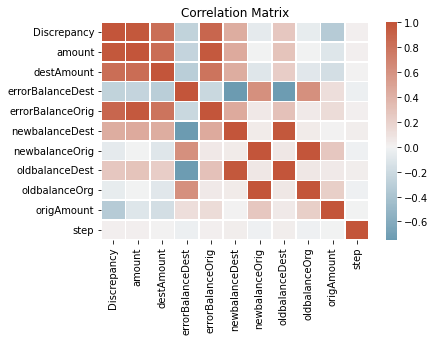

In [ ]:
# Correlation matrix
import numpy as np
import seaborn as sns
corr = data[data.columns.difference(['isFraud','isFlaggedFraud'])].corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, cmap=cmap, center=0,
            square=False, linewidths=0.6)
ax.set_title('Correlation Matrix')
plt.show()

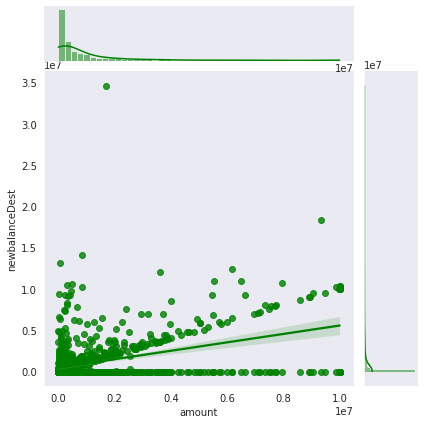

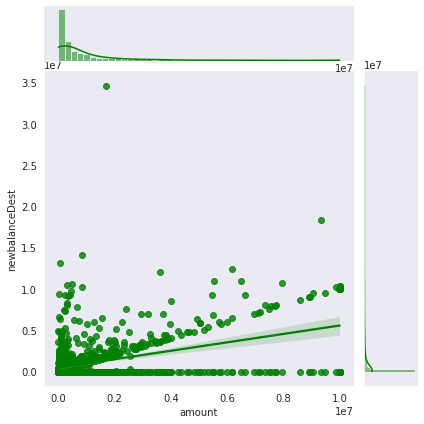

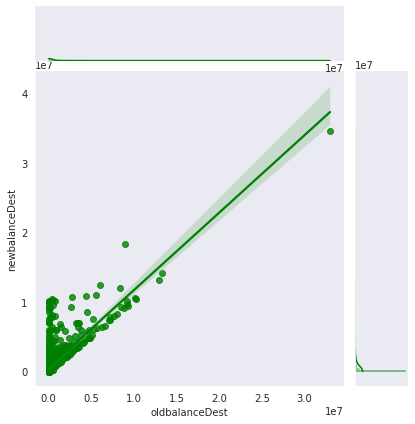

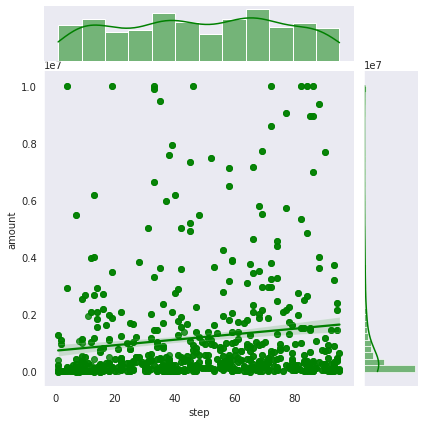

In [ ]:
# Scatter plot $ density plot
tmp = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
tmp = tmp.loc[(tmp.isFraud == 1)]
sns.jointplot(data=tmp, x='amount', y='newbalanceDest', kind='reg', color='g')
sns.jointplot(data=tmp, x='amount', y='newbalanceDest', kind='reg', color='g')
sns.jointplot(data=tmp, x='oldbalanceDest', y='newbalanceDest', kind='reg', color='g')
sns.jointplot(data=tmp, x='step', y='amount', kind='reg', color='g')


6362620
5433525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


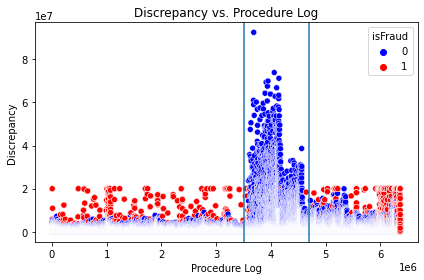

In [ ]:
# Descrepency analysis
tmp = data[['step','type','amount','origAmount','destAmount','isFraud']]
print(len(tmp))
tmp = tmp.loc[((abs(data.amount) - abs(data.origAmount)) != 0)]
print(len(tmp))
tmp1 = data[['step','Discrepancy','isFraud']]
tmp1["Procedure Log"] = list(range(0, len(tmp1)))
ax = sns.scatterplot(data= tmp1,x = "Procedure Log", y = 'Discrepancy', hue = "isFraud", palette=['blue','red'])
ax.set_title('Discrepancy vs. Procedure Log')
plt.tight_layout()
plt.axvline(x=3500000)
plt.axvline(x=4700000)
plt.show()
#print(sum((abs(data.amount) - abs(data.origAmount))/len(tmp)))
#sns.jointplot(data=tmp, x='amount', y='origAmount', kind='reg', color='g')
#sns.jointplot(data=tmp, x='amount', y='destAmount', kind='reg', color='g')
#sns.jointplot(data=tmp, x='step', y='origAmount', kind='reg', color='g')
#sns.jointplot(data=tmp, x='step', y='destAmount', kind='reg', color='g')


In [ ]:
# duplication
duplicate_data = data[['step','type','amount','nameOrig','origAmount','nameDest','destAmount','isFraud']]
duplicate_data = duplicate_data.loc[(duplicate_data.isFraud == 1)]
number_of_fraud = duplicate_data.isFraud.value_counts()
print("Fraud with Duplicate: ",number_of_fraud)

# Extract duplicate 
duplicate_data['duplicate check'] = duplicate_data.amount.shift() == duplicate_data.amount
duplicate_data['duplicate check'] = duplicate_data['duplicate check'] | duplicate_data['duplicate check'].shift(-1)== True
number_of_fraud = duplicate_data.loc[(duplicate_data['duplicate check'] != True)].isFraud.value_counts()
print("Fraud without Duplicate: ", number_of_fraud)

duplicate_data.head(20)

Fraud with Duplicate:  1    1142
Name: isFraud, dtype: int64
Fraud without Duplicate:  1    26
Name: isFraud, dtype: int64


,step,type,amount,nameOrig,origAmount,nameDest,destAmount,isFraud,duplicate check
2,1,TRANSFER,181.00,C1305486145,-181.00,C553264065,0.00,1,True
3,1,CASH_OUT,181.00,C840083671,-181.00,C38997010,-21182.00,1,True
251,1,TRANSFER,2806.00,C1420196421,-2806.00,C972765878,0.00,1,True
252,1,CASH_OUT,2806.00,C2101527076,-2806.00,C1007251739,-26202.00,1,True
680,1,TRANSFER,20128.00,C137533655,-20128.00,C1848415041,0.00,1,True
681,1,CASH_OUT,20128.00,C1118430673,-20128.00,C339924917,5877.85,1,True
724,1,CASH_OUT,416001.33,C749981943,0.00,C667346055,9291517.62,1,False
969,1,TRANSFER,1277212.77,C1334405552,-1277212.77,C431687661,0.00,1,True
970,1,CASH_OUT,1277212.77,C467632528,-1277212.77,C716083600,2444985.19,1,True
1115,1,TRANSFER,35063.63,C1364127192,-35063.63,C1136419747,0.00,1,True


One popular trend is fraud attacks by big criminals happen in a short period of time. To check this, we can plot the fraud attacks with time. In our data, we have data every hour. The below graph shows the fraud attack every hour in the 744 hours. As expected there are peaks and troughs and also a very big peak. This suggests that frauds happen in short period of time.

In [ ]:
df = data
ax = sns.lineplot(x=list(range(1,744)),y=df.groupby("step")["isFraud"].sum())
plt.xlabel("Hour of the month")
plt.ylabel("Number of transactions per hour")
ax.set_title('Number of Transaction in Hour')
plt.show()

ValueError: ignored

Another analysis that can be interesting is at which hour of a day, the fraud attacks generally happen. From the step variable, we can get the hour of day. The below plot shows the frauds at different hours of day. It tells that frauds happen during sleeping hours the most. Close to 20% of transactions that happen during 4 AM and 5 AM are fraud transactions.

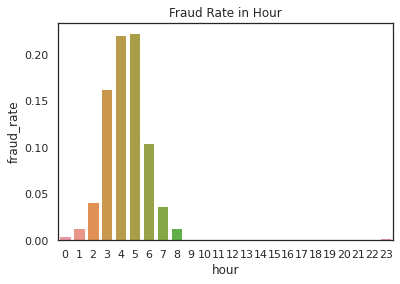

In [ ]:
sns.set_theme()
sns.set_style("white")
df["hour"] = df.step % 24
frauds_hour = pd.concat([df.groupby("hour")["isFraud"].sum(),df.groupby("hour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
ax = sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
ax.set_title('Fraud Rate in Hour')
plt.show()

On day basis

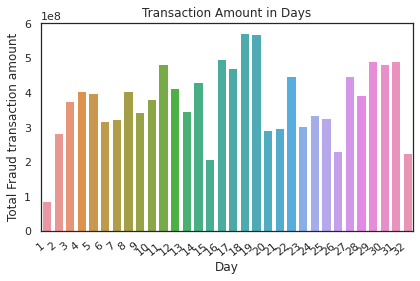

In [ ]:
df["day"] = round(df.step/24)
ax = sns.barplot(x=list(range(1,33)),y=df[df.isFraud==1].groupby("day")["amount"].sum())
plt.xlabel("Day")
plt.ylabel("Total Fraud transaction amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Transaction Amount in Days')
plt.show()

On week basis

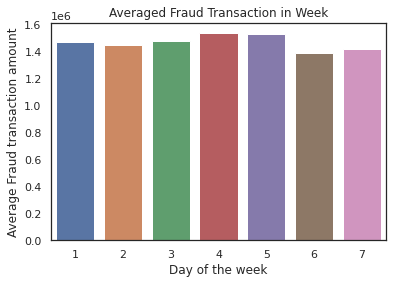

In [ ]:
df["dayweek"] = df.day % 7
ax = sns.barplot(x=list(range(1,8)),y=df[df.isFraud==1].groupby("dayweek")["amount"].mean())
plt.xlabel("Day of the week")
plt.ylabel("Average Fraud transaction amount")
ax.set_title('Averaged Fraud Transaction in Week')
plt.show()

In [ ]:
# Outliers
import numpy as np
import scipy.stats as stats

data['origAmount'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['destAmount'] = data['newbalanceDest'] - data['oldbalanceDest']
tmp = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
tmpFraud = tmp.loc[(data.isFraud ==1)]
tmpNotFraud = tmp.loc[(data.isFraud ==0)]

def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    index = 0
    out_index = []
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
            out_index.append(index)
        index += 1
    print(out_index[1:20])
    print(len(out))

print("Fraud Data Outliers")
ZRscore_outlier(tmpFraud['amount'])
ZRscore_outlier(tmpFraud['origAmount'])
ZRscore_outlier(tmpFraud['destAmount'])

print("Non Fraud Data Outliers")
ZRscore_outlier(tmpNotFraud['amount'])
ZRscore_outlier(tmpNotFraud['origAmount'])
ZRscore_outlier(tmpNotFraud['destAmount'])

Fraud Data Outliers
[29, 70, 71, 129, 130, 145, 146, 152, 153, 222, 223, 227, 228, 309, 310, 333, 334, 349, 350]
1173
[29, 70, 71, 129, 130, 145, 146, 152, 153, 222, 223, 227, 228, 309, 310, 333, 334, 349, 350]
1170
[3, 6, 8, 10, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
4034
Non Fraud Data Outliers
[23, 28, 148, 149, 150, 152, 155, 162, 163, 164, 165, 166, 168, 171, 172, 228, 229, 231, 233]
157829
[2, 3, 6, 7, 8, 9, 10, 11, 12, 41, 42, 43, 45, 46, 47, 48, 120, 121, 122]
1250897
[5, 17, 18, 19, 20, 22, 23, 24, 27, 28, 29, 30, 34, 39, 41, 43, 44, 47, 49]
171004


In [ ]:
def Winsorization_outliers(df):
    out=[]
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    index = 0
    out_index = []
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
            out_index.append(index)
        index += 1
    print(out_index)
    print("Winstoriazation outliers:",len(out))
Winsorization_outliers(tmpFraud['amount'])
Winsorization_outliers(tmpFraud['origAmount'])
Winsorization_outliers(tmpFraud['destAmount'])
# Winsorization_outliers(tmpNotFraud['amount'])
Winsorization_outliers(tmpNotFraud['amount'])
Winsorization_outliers(tmpNotFraud['origAmount'])
Winsorization_outliers(tmpNotFraud['destAmount'])

In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldbalanceDest\' = \
\'newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldbalanceDest\' = \
newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldbalanceDest' = 'newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldbalanceDest' = newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


In [ ]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    # Pick Color & Size
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab20(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        # Strip Plot
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        
        # Give labels
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        # Label Legends
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


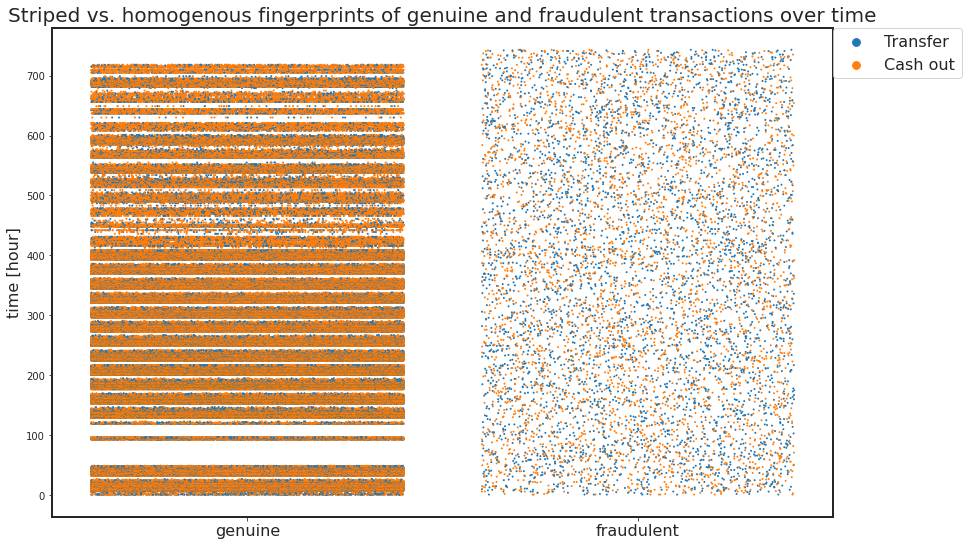

In [ ]:
# Dispersion over time
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


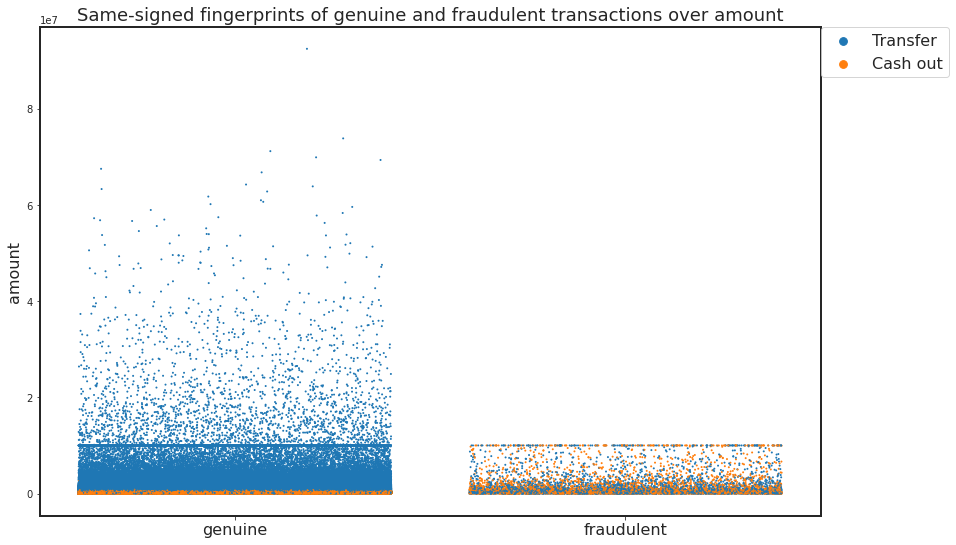

In [ ]:
# Dispersion over amount
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


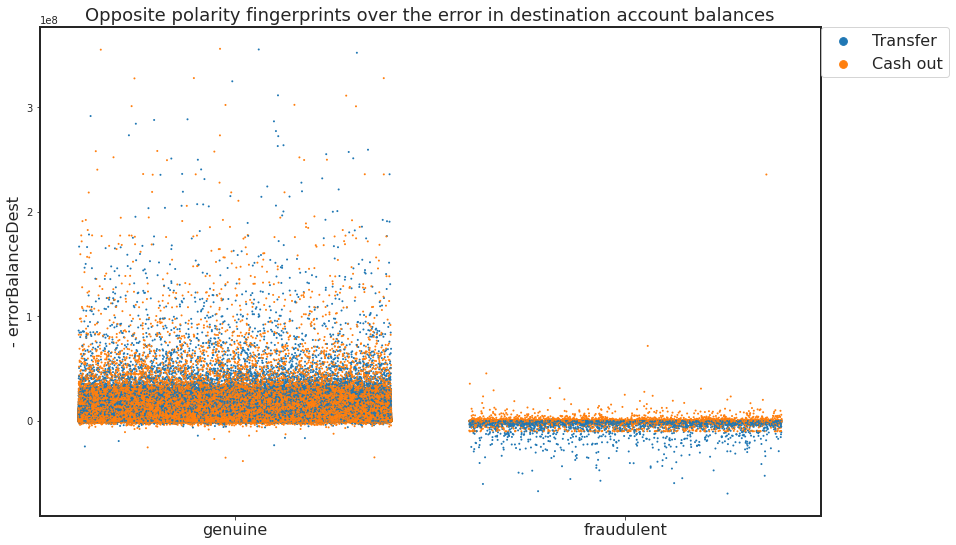

In [ ]:
# Dispersion over error in balance in destinatino accounts
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

In [ ]:
import matplotlib.lines as mlines

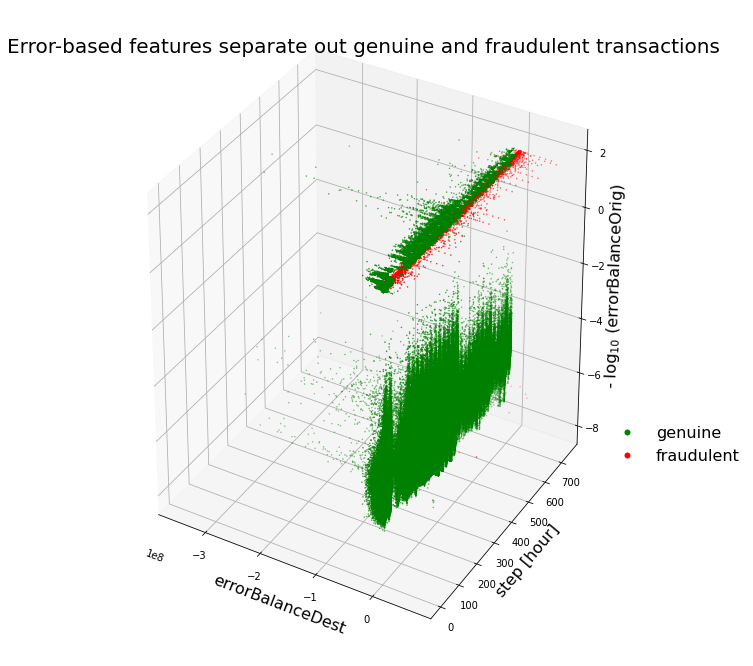

In [ ]:
# Long computation in this cell (~2.5 minutes)
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

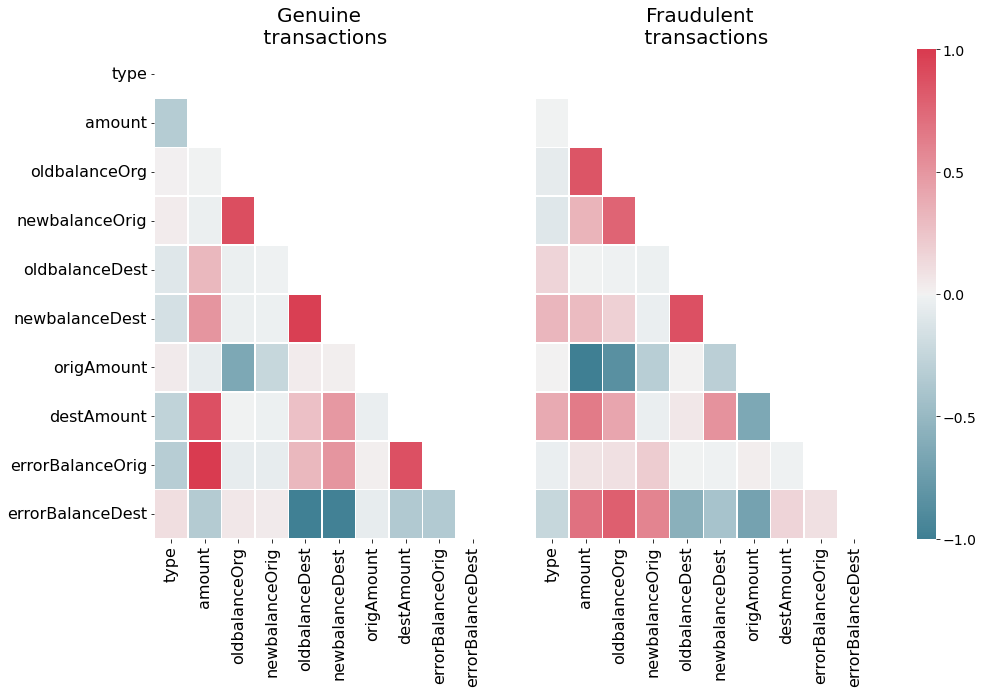

In [ ]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);


# **Process Data**



In [ ]:
import numpy as np

In [ ]:
# Split Train & Test sets
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
Y = X['isFraud']
del X['isFraud']
# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

In [ ]:
# Feature engineering
X['origAmount'] = X['newbalanceOrig'] - X['oldbalanceOrg']
X['destAmount'] = X['newbalanceDest'] - X['oldbalanceDest']
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceOrg + X.amount - X.newbalanceDest

In [ ]:
feature_list = X.columns
print(feature_list)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'origAmount', 'destAmount',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [ ]:
randomState = 5
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)

# Random Forest

In [ ]:
# Limit depth of tree to 3 levels

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pydot

rf_small = RandomForestClassifier(max_depth=3, n_estimators= 20, random_state=randomState,oob_score=True)
# Extract the small tree
rf_small.fit(trainX, trainY)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
tree.export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


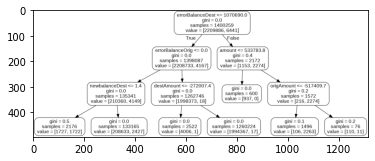

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('small_tree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(rf_small.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: origAmount Importance: 0.35
Variable: errorBalanceDest Importance: 0.15
Variable: newbalanceDest Importance: 0.11
Variable: amount     Importance: 0.08
Variable: step       Importance: 0.07
Variable: type       Importance: 0.06
Variable: oldbalanceOrg Importance: 0.06
Variable: destAmount Importance: 0.06
Variable: oldbalanceDest Importance: 0.03
Variable: errorBalanceOrig Importance: 0.03
Variable: newbalanceOrig Importance: 0.01


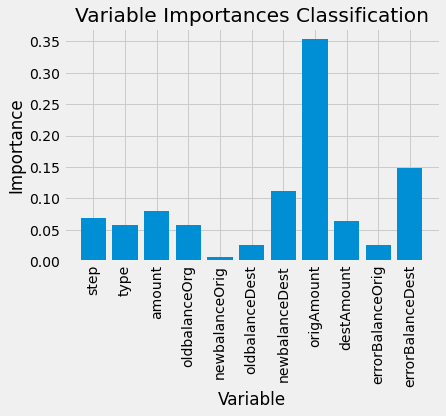

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances Classification');

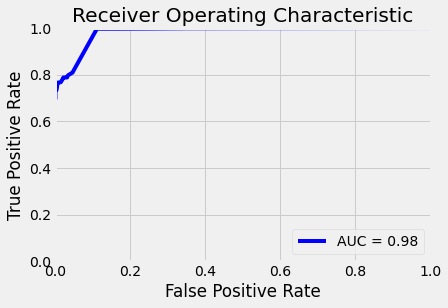

In [ ]:
# Small Testing
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
# Use the forest's predict method on the test data
rf_probs = rf_small.predict_proba(testX)[:,1]
preds = rf_small.predict(testX)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(testY, rf_probs)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

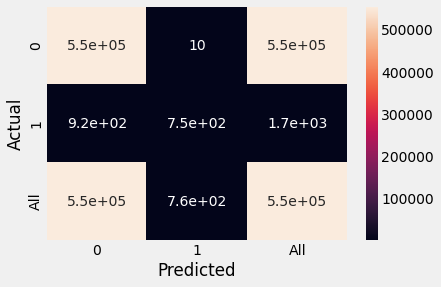

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(testY, preds, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
pred = np.argmax(rf_small.oob_decision_function_,axis=1)
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(trainY, pred))

from sklearn.metrics import classification_report
print(classification_report(testY, preds))
# recall of positive = sensitivity
# recall of negative = specificity

accuracy_score: 0.9983838124969826
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552412
           1       0.99      0.45      0.62      1670

    accuracy                           1.00    554082
   macro avg       0.99      0.72      0.81    554082
weighted avg       1.00      1.00      1.00    554082



### Important features Random Forest Tree

In [ ]:
# Extract the two most important features
# important_indices = ['step','type','amount','newbalanceOrig','newbalanceDest','origAmount','errorBalanceOrig']
# train_important = trainX[important_indices]
# test_important = testX[important_indices]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_most_important = RandomForestClassifier(max_depth=6, n_estimators= 500, random_state=randomState,oob_score=True)
# Train the random forest
rf_most_important.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
# Get numerical feature importances
importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: origAmount Importance: 0.21
Variable: newbalanceOrig Importance: 0.14
Variable: errorBalanceDest Importance: 0.1
Variable: type       Importance: 0.09
Variable: destAmount Importance: 0.09
Variable: newbalanceDest Importance: 0.08
Variable: oldbalanceOrg Importance: 0.07
Variable: oldbalanceDest Importance: 0.07
Variable: step       Importance: 0.06
Variable: errorBalanceOrig Importance: 0.06
Variable: amount     Importance: 0.04


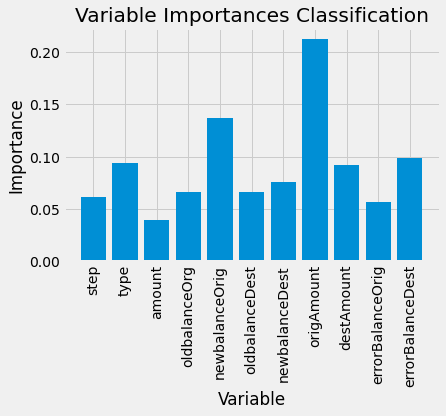

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances Classification');

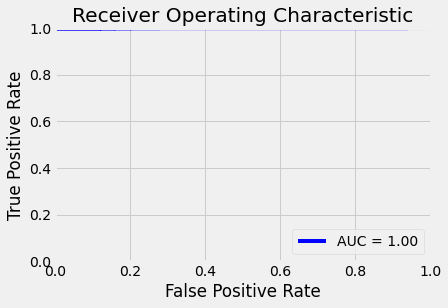

In [ ]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
# Use the forest's predict method on the test data
rf_probs = rf_most_important.predict_proba(testX)[:,1]
preds = rf_most_important.predict(testX)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(testY, rf_probs)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import copy

rf_probs_01 = rf_probs.copy()
rf_probs_th_01 = 0.205
rf_probs_01[rf_probs_01 > rf_probs_th_01] = 1
rf_probs_01[rf_probs_01 <= rf_probs_th_01] = 0
rf_probs_th_02 = 0.25
rf_probs_02 = rf_probs.copy()
rf_probs_02[rf_probs_02 > rf_probs_th_02] = 1
rf_probs_02[rf_probs_02 <= rf_probs_th_02] = 0

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(testY, preds) # 0.5
conf_matrix_01 = confusion_matrix(testY, rf_probs_01) # 0.205
conf_matrix_02 = confusion_matrix(testY, rf_probs_02) # 0.25
print(conf_matrix)
print(conf_matrix_01)
print(conf_matrix_02)

[[552412      0]
 [   466   1204]]
[[552396     16]
 [     5   1665]]
[[552401     11]
 [   391   1279]]


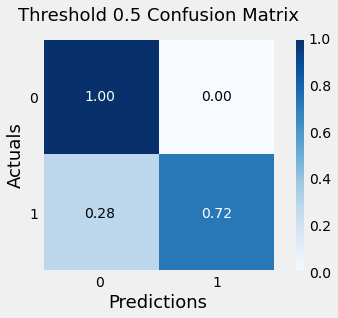

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(conf_mat = conf_matrix,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.5 Confusion Matrix', fontsize=18)

plt.show()

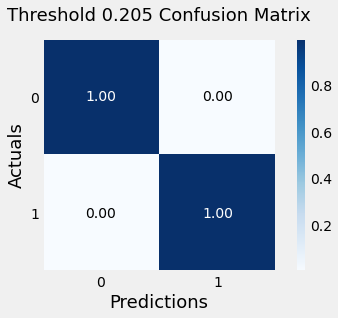

In [ ]:
fig = plot_confusion_matrix(conf_mat = conf_matrix_01,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.205 Confusion Matrix', fontsize=18)

plt.show()


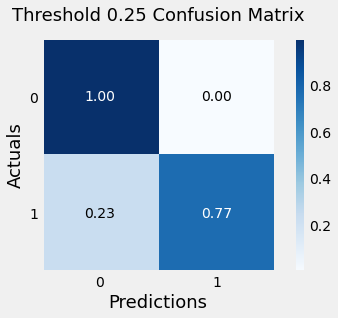

In [ ]:
fig = plot_confusion_matrix(conf_mat = conf_matrix_02,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.25 Confusion Matrix', fontsize=18)

plt.show()

In [ ]:
print("oob score:", rf_most_important.oob_score_)
pred = np.argmax(rf_most_important.oob_decision_function_,axis=1)

from sklearn.metrics import accuracy_score
print("accuracy score:",accuracy_score(pred,trainY))


oob score: 0.9991400185983386
accuracy score: 0.9991400185983386


# Logistics Regression


## Variable Transformation

In [ ]:
import numpy as np
X['errorBalanceDest'] = np.log(abs(X['errorBalanceDest']) + 1)
X['errorBalanceOrig'] = np.log(abs(X['errorBalanceOrig']) + 1)
X['destAmount'] = np.log(abs(X['destAmount']) + 1)
X['origAmount'] = np.log(abs(X['origAmount']) + 1)

In [ ]:
randomState = 5
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)

## Variable Selections

In [ ]:
# ii. RFE (Recursive Feature Elimination)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model,8)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X, Y)  
#Fitting the data to model
model.fit(X_rfe,Y)
print(trainX.columns.values[rfe.support_])
print(trainX.columns.values)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['step' 'type' 'oldbalanceOrg' 'newbalanceOrig' 'origAmount' 'destAmount'
 'errorBalanceOrig' 'errorBalanceDest']
['step' 'type' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'oldbalanceDest'
 'newbalanceDest' 'origAmount' 'destAmount' 'errorBalanceOrig'
 'errorBalanceDest']
[1 1 2 1 1 4 3 1 1 1 1]


## With Lasso

In [ ]:
# Lasso Regression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(penalty='l1', solver='liblinear')
reg.fit(trainX, trainY)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Best score using built-in LassoCV: %f" %reg.score(testX,testY))

Best score using built-in LassoCV: 0.998953


In [ ]:
coef = pd.Series(reg.coef_[0], index = X.columns)
coef

step                0.005343
type                0.518573
amount              0.000004
oldbalanceOrg       0.000008
newbalanceOrig     -0.000012
oldbalanceDest      0.000004
newbalanceDest     -0.000004
origAmount          0.358894
destAmount         -0.573411
errorBalanceOrig   -0.540625
errorBalanceDest   -0.198621
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

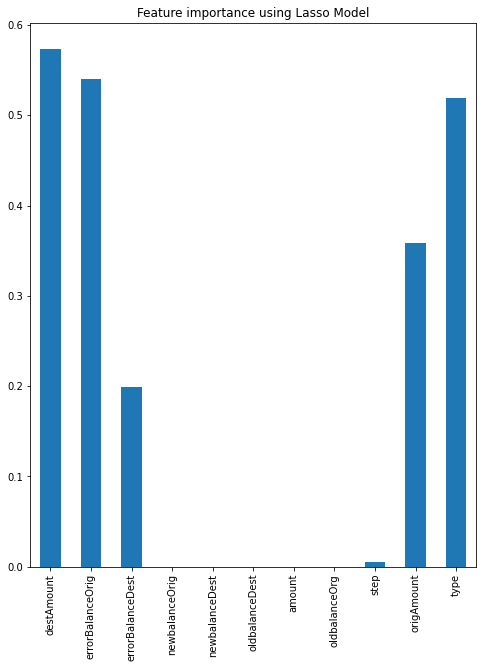

In [ ]:
imp_coef = abs(coef.sort_values())
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

In [ ]:
y_pred_lasso = reg.predict(testX)
y_preda_lasso = reg.predict_proba(testX)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(reg.score(testX, testY)))

Accuracy of logistic regression classifier on test set: 0.99895


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(testY, y_pred_lasso) # 0.205
print(conf_matrix)

[[552354     58]
 [   522   1148]]


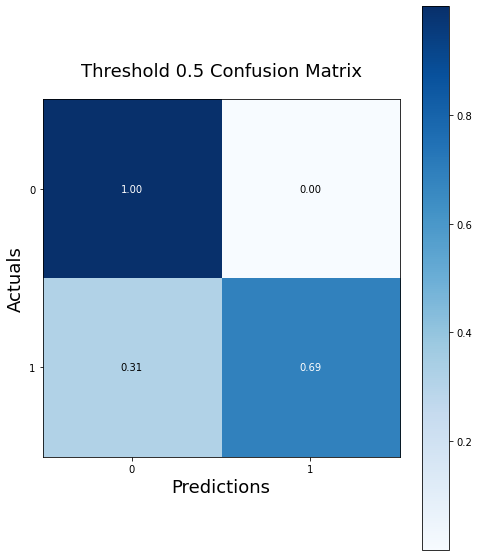

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(conf_mat = conf_matrix,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.5 Confusion Matrix', fontsize=18)

plt.show()

In [ ]:
# Bad precision 
from sklearn.metrics import classification_report
print(classification_report(testY, y_pred_lasso))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552412
           1       0.95      0.69      0.80      1670

    accuracy                           1.00    554082
   macro avg       0.98      0.84      0.90    554082
weighted avg       1.00      1.00      1.00    554082



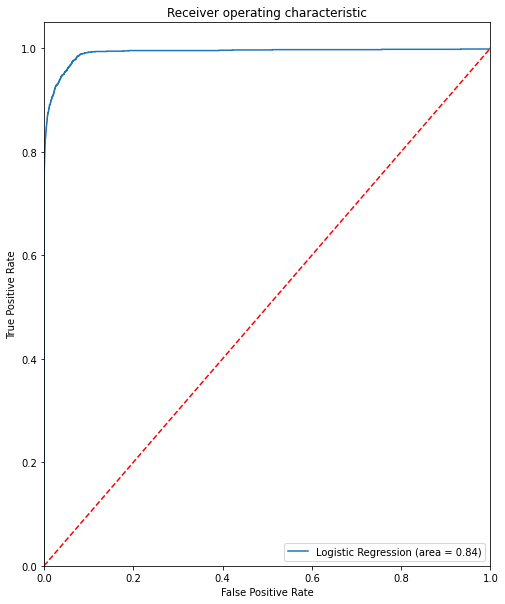

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testY, reg.predict(testX))
fpr, tpr, thresholds = roc_curve(testY, reg.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
y_preda_lasso = y_preda_lasso[:,1]

In [ ]:
import copy

probs = y_preda_lasso.copy()
probs_th = 0.105
probs[probs > probs_th] = 1
probs[probs <= probs_th] = 0

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(testY, probs) # 0.205
conf_matrix

array([[552039,    373],
       [   384,   1286]])

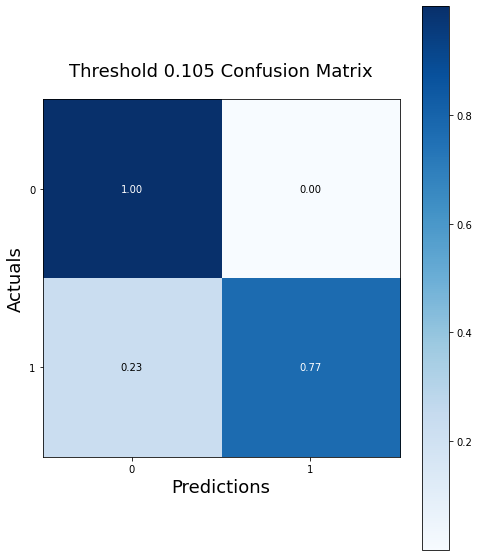

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(conf_mat = conf_matrix,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.105 Confusion Matrix', fontsize=18)

plt.show()

## With RFE


In [ ]:
logTrainX = trainX[trainX.columns[rfe.support_]]
logTestX = testX[testX.columns[rfe.support_]]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(logTrainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(logTestX)
y_preda = logreg.predict_proba(logTestX)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(logTestX, testY)))

Accuracy of logistic regression classifier on test set: 0.99854


In [ ]:
# y_preda = y_preda[:,1]
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[552367     45]
 [   763    907]]


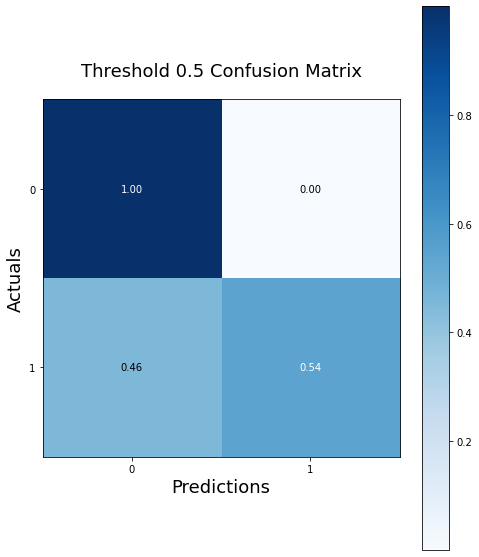

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(conf_mat = confusion_matrix,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.5 Confusion Matrix', fontsize=18)

plt.show()

In [ ]:
# Bad precision 
from sklearn.metrics import classification_report
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552412
           1       0.95      0.54      0.69      1670

    accuracy                           1.00    554082
   macro avg       0.98      0.77      0.85    554082
weighted avg       1.00      1.00      1.00    554082



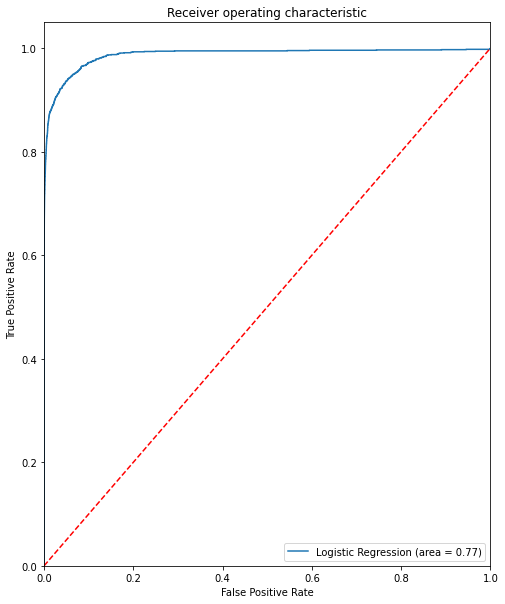

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testY, logreg.predict(logTestX))
fpr, tpr, thresholds = roc_curve(testY, logreg.predict_proba(logTestX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
y_preda = y_preda[:,1]

In [ ]:
import copy

log_probs = y_preda.copy()
log_probs_th = 0.2
log_probs[log_probs > log_probs_th] = 1
log_probs[log_probs <= log_probs_th] = 0

from sklearn.metrics import confusion_matrix
conf_matrix_log = confusion_matrix(testY, log_probs) # 0.205
print(conf_matrix_log)

[[552223    189]
 [   593   1077]]


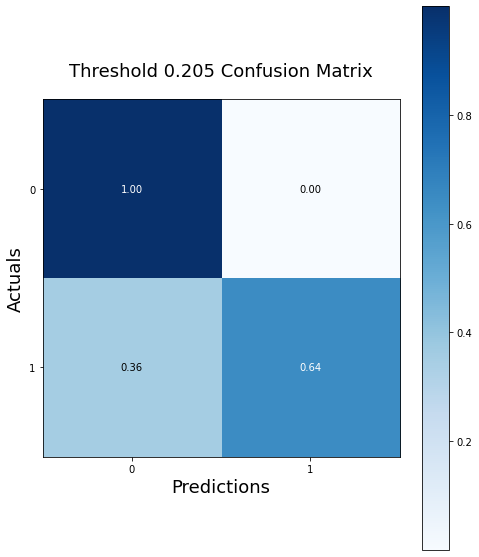

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig = plot_confusion_matrix(conf_mat = conf_matrix_log,
                      show_absolute = False,
                      show_normed = True,
                      colorbar = True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Threshold 0.205 Confusion Matrix', fontsize=18)

plt.show()